# Smart Segmentation

#### Imports

In [2]:
import os
import pymesh
import pymeshlab
import numpy as np
%matplotlib inline 
from tqdm import tqdm
import matplotlib.pyplot as plt
from kaolin.io.obj import (import_mesh)
from mpl_toolkits.mplot3d import Axes3D
from segmentation_utils.base_detection import (
    _check_mesh,
    _subset,
    _plot,
    _save_modified_mesh,
    _get_normal_to_vertices,
    _get_open_mesh,
    _get_connected_components,
    _get_edges,
    _get_wire_network,
    _dist,
    _get_outer_layer,
    _get_cog,
    _get_midpoint,
    _law_of_cosine,
    _get_bases
)
from segmentation_utils.preprocessing import (
    _npz_to_obj,
    _obj_to_npz
)

In [3]:
# Assumption is model is positioned such that base has it's y-coordinate minimized
maximas_path = lambda mesh_dir, coord: f"{mesh_dir}/{coord}_maximas.obj"
minimas_path = lambda mesh_dir, coord: f"{mesh_dir}/{coord}_minimas.obj"
imad = "/home/ubuntu/imad"
models_dir = f"{imad}/segmentation/models"
fomrative_dir = f"{imad}/formative_models_oriented"

mesh_dir = f"{models_dir}/vases/vase_1"
mesh_path = f"{mesh_dir}/vase.obj"
open_mesh_path = f"{mesh_dir}/open_mesh.obj"

e = 0.1
axes = ("x", "y", "z")
_check_mesh(mesh_path)
axes_colors = {"x": [0, 1], "y": [2, 3], "z": [4, 5]}

Success[/home/ubuntu/imad/segmentation/models/vases/vase_1/vase.obj is good!]: Number of verticies (21311) == the number of normals (21311)


#### Computing extremas

In [5]:
mesh = import_mesh(mesh_path, with_normals=True)
extremas = _get_bases(mesh, e)

>> min_x: 2.5758330821990967
>> max_x: 4.13369083404541

>> min_y: -2.1702940464019775
>> max_y: -0.4518060088157654

>> min_z: -1.0657860040664673
>> max_z: 0.49282100796699524



#### Display extremas

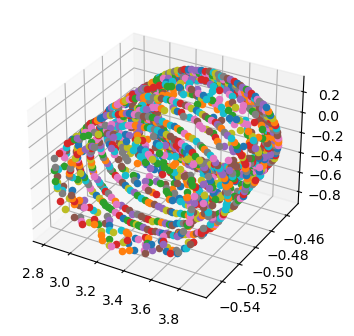

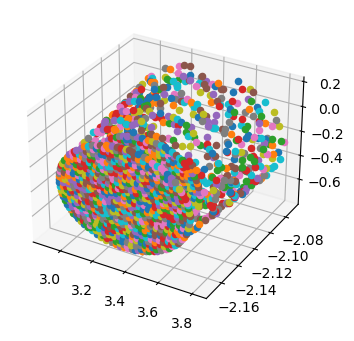

In [7]:
axis = "y"
_plot(mesh, extremas[axis][0]) # maximums
_plot(mesh, extremas[axis][1]) # minumims

#### Peeling mesh

In [ ]:
axis = axes[0]
open_mesh = _get_open_mesh(mesh, extremas, axes)
_save_modified_mesh(mesh, extremas[axis][0], maximas_path(mesh_dir, axis))
_save_modified_mesh(mesh, extremas[axis][1], minimas_path(mesh_dir, axis))
_save_modified_mesh(mesh, open_mesh, open_mesh_path)

#### Compute connected components

In [ ]:
_get_connected_components(open_mesh_path, mesh_dir)

#### Extract layers 

In [ ]:
ms = pymeshlab.MeshSet()
ms.load_new_mesh(mesh_path)
bbox = ms.current_mesh().bounding_box()
max_ = bbox.max()
min_ = bbox.min()
cog = _get_center(min_, max_)
# print(max_, min_)
print(f"COG: {cog}")
outer, inner = _get_outer_layer(mesh, cog)
_save_modified_mesh(mesh, outer, f"{mesh_dir}/component_x_outer.obj", cog)
_save_modified_mesh(mesh, inner, f"{mesh_dir}/component_x_inner.obj", cog)
# _plot(mesh, [i for i in range(len(mesh.vertices))])